In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
vr_df = pd.read_csv("Resources/Vacancy Rate Concat.csv").dropna()
vr_df = vr_df.rename(columns={'Bachelor ': 'Bachelor','Dwelling Type ': 'Dwelling Type','Total ': 'Total'})
vr_df = vr_df[(vr_df["Total"]!=0)]
vr_df.head()

,Province,Centre,Zone,Neighbourhood,Dwelling Type,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total,Year
1,Nfld.Lab.,St. John's,St. John's East,St. John's East,Apt & Other,0.0,3.9,6.4,5.2,5.6,2018
2,Nfld.Lab.,St. John's,St. John's West,St. John's West,Row,0.0,0.0,0.0,0.0,1.5,2018
3,Nfld.Lab.,St. John's,St. John's West,St. John's West,Apt & Other,3.9,6.1,6.1,0.0,6.2,2018
7,N.S.,Halifax,Peninsula South,Downtown Halifax,Apt & Other,0.7,1.1,1.1,1.4,1.1,2018
9,N.S.,Halifax,Peninsula South,South End,Apt & Other,1.2,0.8,1.4,1.2,1.1,2018


In [3]:
vr_trend_df = vr_df[['Province','Year','Total']]

provinces_for_trend = ["Alta", "B.C.","Ont.","Que","Sask."]

vr_trend_df = vr_trend_df[(vr_trend_df['Province'].isin(provinces_for_trend))]

vr_trend_df = pd.pivot_table(vr_trend_df, index='Year', columns='Province', aggfunc='mean', fill_value=0).reset_index()

vr_trend_df.columns = ["Year", "Alta", "B.C.", "Ont.","Que","Sask."]

vr_trend_df.head()

,Year,Alta,B.C.,Ont.,Que,Sask.
0,2018,5.074468,1.238710,1.838158,2.230328,7.765000
1,2019,4.806207,1.318085,1.912131,1.680000,7.014286
2,2020,5.391406,2.454082,2.736691,1.987500,6.888889
3,2021,5.006923,1.317391,2.741569,1.609804,5.900000
4,2022,2.604237,1.285227,1.602642,1.186792,3.334286


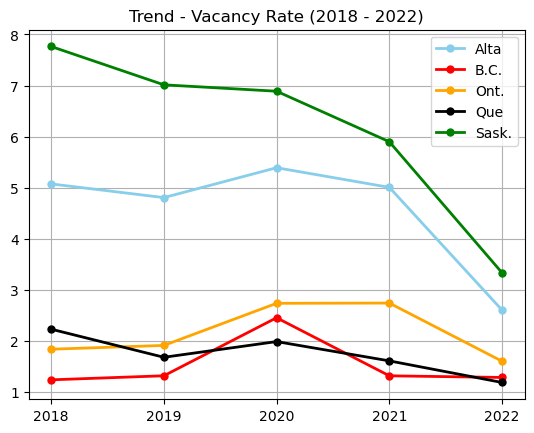

In [4]:
#plot Rent Trend:
plt.plot( 'Year', 'Alta', data=vr_trend_df, marker='o', markerfacecolor='skyblue', markersize=5, color='skyblue', linewidth=2)
plt.plot( 'Year', 'B.C.', data=vr_trend_df, marker='o', markerfacecolor='red', markersize=5, color='red', linewidth=2)

plt.plot( 'Year', 'Ont.', data=vr_trend_df, marker='o', markerfacecolor='orange', markersize=5, color='orange', linewidth=2)
plt.plot( 'Year', 'Que', data=vr_trend_df, marker='o', markerfacecolor='black', markersize=5, color='black', linewidth=2)
plt.plot( 'Year', 'Sask.', data=vr_trend_df, marker='o', markerfacecolor='green', markersize=5, color='green', linewidth=2)

plt.xticks([2018,2019,2020,2021,2022])

plt.title("Trend - Vacancy Rate (2018 - 2022)")
plt.grid()
plt.legend()

plt.savefig('Resources/output/vacancy_rate/Trend_Vacancy_Rate.png')

plt.show()

In [5]:
vr_df_2022 = vr_df[(vr_df['Year']==2022)]

vr_summary_bachelor = vr_df_2022.groupby(["Province"]).mean(numeric_only=True)["Bachelor"]
vr_summary_one_bedroom = vr_df_2022.groupby(["Province"]).mean(numeric_only=True)["1 Bedroom"]
vr_summary_two_bedroom = vr_df_2022.groupby(["Province"]).mean(numeric_only=True)["2 Bedroom"]
vr_summary_three_bedroom_plus = vr_df_2022.groupby(["Province"]).mean(numeric_only=True)["3 Bedroom +"] 
vr_summary_three_bedroom_total = vr_df_2022.groupby(["Province"]).mean(numeric_only=True)["Total"] 

vr_summary_2022 = pd.concat([vr_summary_bachelor, vr_summary_one_bedroom, vr_summary_two_bedroom,
                           vr_summary_three_bedroom_plus, vr_summary_three_bedroom_total]
                          , axis=1)

vr_summary_2022.columns = ["Bachelor", "1 Bedroom", "2 Bedroom", "3 Bedroom +","Total"]
vr_summary_2022

,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total
Province,,,,,
Alta,0.565254,1.700000,2.074576,1.006780,2.604237
B.C.,0.823864,0.973864,1.152273,0.667045,1.285227
Man.,0.950000,1.690625,1.834375,2.093750,2.621875
N.B.,0.000000,0.758333,0.941667,0.741667,1.283333
N.S.,0.160000,0.580000,0.790000,0.200000,1.075000
Nfld.Lab.,3.966667,3.366667,1.133333,1.000000,2.866667
Ont.,0.405660,1.177736,1.063019,0.362264,1.602642
Que,0.300000,0.883019,0.700943,0.300943,1.186792
Sask.,1.851429,2.811429,2.911429,0.905714,3.334286


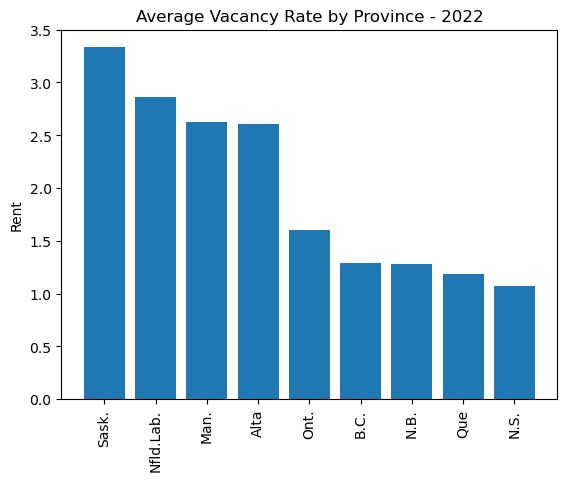

In [6]:
#plot Total:
vr_summary = vr_summary_2022.sort_values(by="Total", ascending=False)
x = vr_summary.index
y = vr_summary['Total']

plt.ylabel("Rent")
plt.xticks(rotation=90)
plt.bar(x,y)

plt.title("Average Vacancy Rate by Province - 2022")

plt.savefig('Resources/output/vacancy_rate/Bar_Vacancy_Rate_2022.png')

plt.show()

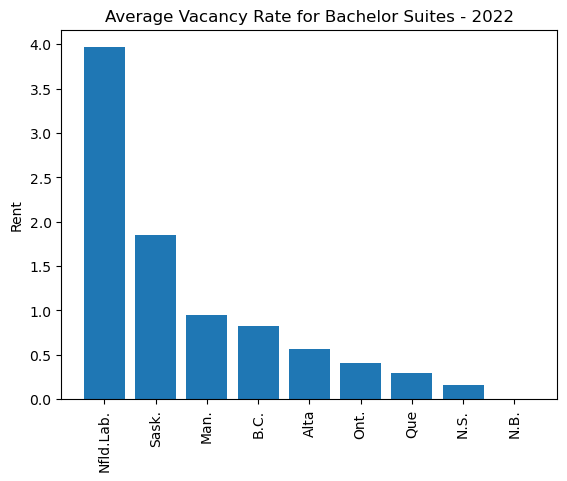

In [7]:
#plot 1:
vr_summary = vr_summary_2022.sort_values(by="Bachelor", ascending=False)
x = vr_summary.index
y = vr_summary['Bachelor']

plt.ylabel("Rent")
plt.xticks(rotation=90)
plt.bar(x,y)

plt.title("Average Vacancy Rate for Bachelor Suites - 2022")

plt.savefig('Resources/output/vacancy_rate/Bar_Vacancy_Rate_Bachelor_2022.png')

plt.show()

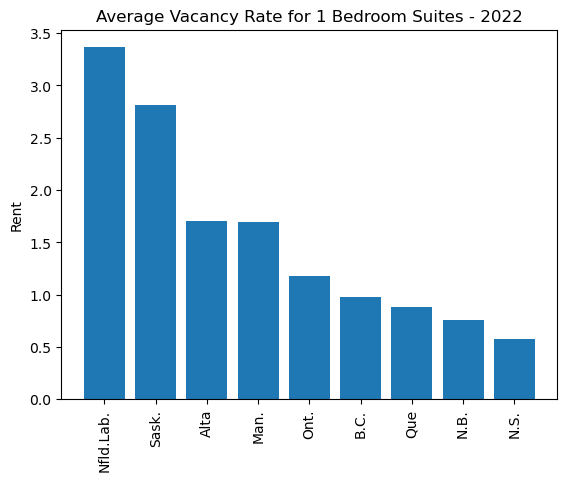

In [8]:
#plot 2:
vr_summary = vr_summary_2022.sort_values(by="1 Bedroom", ascending=False)
x = vr_summary.index
y = vr_summary['1 Bedroom']

plt.ylabel("Rent")
plt.xticks(rotation=90)
plt.bar(x,y)

plt.title("Average Vacancy Rate for 1 Bedroom Suites - 2022")

plt.savefig('Resources/output/vacancy_rate/Bar_Vacancy_Rate_1_br_2022.png')

plt.show()

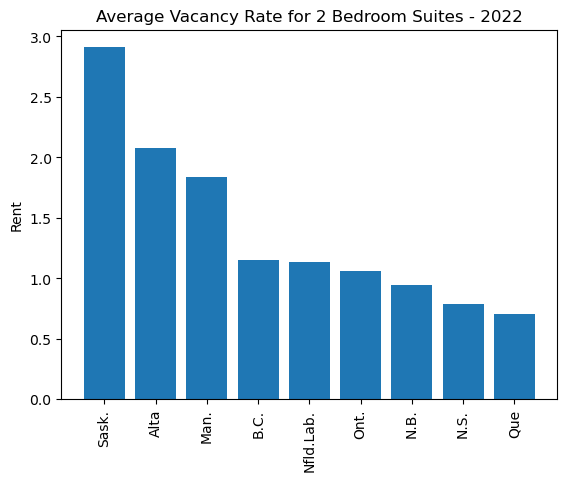

In [9]:
#plot 3:
vr_summary = vr_summary_2022.sort_values(by="2 Bedroom", ascending=False)
x = vr_summary.index
y = vr_summary['2 Bedroom']

plt.ylabel("Rent")
plt.xticks(rotation=90)
plt.bar(x,y)

plt.title("Average Vacancy Rate for 2 Bedroom Suites - 2022")

plt.savefig('Resources/output/vacancy_rate/Bar_Vacancy_Rate_2_br_2022.png')

plt.show()

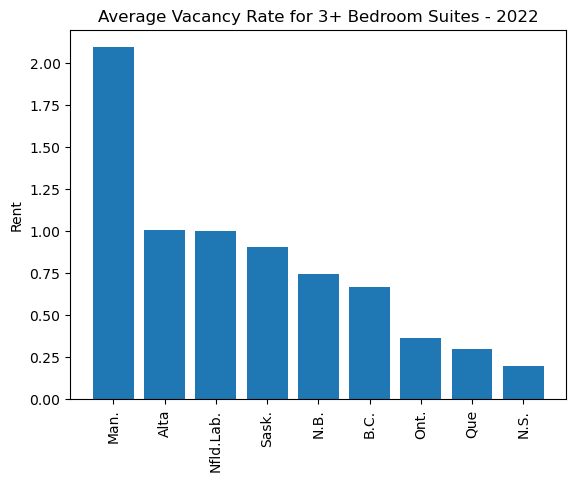

In [10]:
#plot 4:
vr_summary = vr_summary_2022.sort_values(by="3 Bedroom +", ascending=False)
x = vr_summary.index
y = vr_summary['3 Bedroom +']

plt.ylabel("Rent")
plt.xticks(rotation=90)
plt.bar(x,y)

plt.title("Average Vacancy Rate for 3+ Bedroom Suites - 2022")

plt.savefig('Resources/output/vacancy_rate/Bar_Vacancy_Rate_3_br_2022.png')

plt.show()